# Sentiment Analysis
This notebook is just for testing parts of the app before creating the final python files.

In [2]:
import pandas as pd

# Load the CSV file using pandas with multiple delimiters
df_train = pd.read_csv('data/semeval-2017-train.csv', delimiter='\t')
df_test = pd.read_csv('data/semeval-2017-test.csv', delimiter='\t')

In [ ]:
df_train.info()

In [ ]:
df_train.head()

In [1]:
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
)

model_name = 'artifish/llama3.2-uncensored'
new_model = "output"
device_map = {"": 0}

base_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map=device_map,
)


OSError: artifish/llama3.2-uncensored is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [71]:
# MODEL = 'llama3.2'
MODEL = 'artifish/llama3.2-uncensored'
# system_prompt =  """You are an assistant that does sentiment analysis on the comments of a social media platform.  Classify the sentiment of the following text as -1, 0, 1 and No explanation is needed.
#                     your answer must have the following format: This is a [label] comment."""

# system_prompt = """
# You are an AI assistant model trained for sentiment analysis. Your task is to analyze the sentiment of each input text and classify it into one of the following categories:
# Positive sentiment: Assign the number `1`.
# Negative sentiment: Assign the number `-1`.
# Neutral sentiment: Assign the number `0`.

# Rules for classification:
# Positive sentiment includes texts expressing happiness, satisfaction, praise, or approval.
# Negative sentiment includes texts expressing dissatisfaction, criticism, sadness, or disapproval.
# Neutral sentiment includes texts that are informational, factual, or lack an emotional tone.
# For each input text, output the classification in the following format: "This is a [sentiment score] comment." Replace `[sentiment score]` with `1`, `-1`, or `0` based on the sentiment of the text.

# Example Input:
# 1. "I love this product! It's amazing."
# 2. "The service was terrible; I am disappointed."
# 3. "The weather today is partly cloudy."

# Example Output:
# "This is a 1 comment."
# "This is a -1 comment."
# "This is a 0 comment."
# """
system_prompt = """
You are an AI assistant that performs sentiment analysis on text reviews. Your task is to classify the sentiment of the provided text into one of the following categories:
Positive sentiment: Assign the label `1`.
Negative sentiment: Assign the label `0`.

Output Format:
Always respond with the classification in the following format: "This is a [label] comment." Replace `[label]` with `1` for positive sentiment or `0` for negative sentiment.

Example Input:
"This movie was absolutely fantastic! Highly recommend."
Example Output:
"This is a 1 comment."

Example Input:
"The plot was boring, and the characters were poorly written."
Example Output:
"This is a 0 comment."
"""



In [72]:
messages = [
    {'role': 'system', 'content': system_prompt}
    ]

In [ ]:
messages

In [74]:
import copy

def user_prompt(messages_list, text):
    user_prompt = f'provide the label for this text: \n\n{text}'
    m = copy.deepcopy(messages_list)
    m.append({'role': 'user', 'content': user_prompt})
    return m

In [ ]:
df_test['text'][0]

In [76]:
m = df_test['text'][0]

In [ ]:
df_test['label'][0]

In [ ]:
m

In [ ]:
import ollama

response = ollama.chat(model= MODEL, 
                       messages=user_prompt(messages, m)
                    )
print(response['message']['content'])

In [ ]:
import re

def extract_integer(text):
    match = re.search(r'-?\d+', text)  # Updated regex to handle both positive and negative numbers
    if match:
        return int(match.group())
    return None

# Example usage
text = "This is a -1 comment."
number = extract_integer(text)
print(number)


In [ ]:
extract_integer(response['message']['content'])

In [ ]:
response['message']['content']

In [ ]:
user_prompt(messages, m)

In [ ]:
from IPython.display import Markdown, display
# Display the markdown content
display(Markdown(response['message']['content']))

In [ ]:
from tqdm import tqdm
l = []
for i in tqdm(range(len(df_test['label'][:100]))):
    response = ollama.chat(model= MODEL, 
                       messages=user_prompt(messages, "Nigga you are so good!")
                    )
    l.append(extract_integer(response['message']['content']))

In [ ]:
df_test['Predicted'] = l

In [ ]:
df_test.head()

In [ ]:
l

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Extract the columns for the confusion matrix
y_true = df_test["label"][:100]
# y_pred = df_test["Predicted"]
y_pred = l
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=set(y_true))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [1]:
# MODEL = 'llama3.2'
MODEL = 'artifish/llama3.2-uncensored'

system_prompt = """
You are an AI assistant that performs sentiment analysis on text reviews. Your task is to classify the sentiment of the provided text into one of the following categories:
Positive sentiment: Assign the label `1`.
Negative sentiment: Assign the label `0`.

Output Format:
Always respond with the classification in the following format: "This is a [label] comment." Replace `[label]` with `1` for positive sentiment or `0` for negative sentiment.

Example Input:
"This movie was absolutely fantastic! Highly recommend."
Example Output:
"This is a 1 comment."

Example Input:
"The plot was boring, and the characters were poorly written."
Example Output:
"This is a 0 comment."
"""


In [2]:
from datasets import load_dataset_builder
dataset_builder = load_dataset_builder('imdb')
print(dataset_builder.cache_dir)
print(dataset_builder.info.features)
print(dataset_builder.info.splits)

C:\Users\Mojtaba\.cache\huggingface\datasets/imdb/plain_text/0.0.0/e6281661ce1c48d982bc483cf8a173c1bbeb5d31
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}
{'train': SplitInfo(name='train', num_bytes=33435948, num_examples=25000, shard_lengths=None, dataset_name='imdb'), 'test': SplitInfo(name='test', num_bytes=32653810, num_examples=25000, shard_lengths=None, dataset_name='imdb'), 'unsupervised': SplitInfo(name='unsupervised', num_bytes=67113044, num_examples=50000, shard_lengths=None, dataset_name='imdb')}


In [3]:
from datasets import load_dataset

# Load the IMDb dataset
dataset = load_dataset("imdb")

# Inspect the dataset
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [4]:
# Access the training and testing data
train_data = dataset["train"]
test_data = dataset["test"]

# Print some example data
print(train_data[0])  # Example from training data
print(test_data[0])   # Example from testing data


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [5]:
import pandas as pd

# Convert to pandas DataFrame for train and test
df_train = pd.DataFrame({
    "text": train_data["text"],  # Extract text from the training data
    "label": train_data["label"]  # Extract labels from the training data
})

df_test = pd.DataFrame({
    "text": test_data["text"],  # Extract text from the testing data
    "label": test_data["label"]  # Extract labels from the testing data
})


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
df_test.head()

,text,label
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0


In [8]:
df_test['label'].value_counts()

label
0    12500
1    12500
Name: count, dtype: int64

In [9]:
df_test.iloc[15000]['text']

'To think this film was made the year I was born. To think people are still having their constitutional rights taken away, now in the name of "homeland security". To think this movie was intentionally banned from the American public. PUNISHMENT PARK addresses the political divide in the United States better than any movie I\'ve ever seen. Had it been more widely seen, would it have changed anything? A movie like this is so polarizing, it has the potential to cause riots. It shakes you up and forces you to take sides. It makes you face the issue: are you for the people\'s right of dissent in a time of war, or for the constitution being compromised in the name of "national security"? The protagonists are forced by the government to race to the American flag in a game that undermines the very ideals the flag stands for. The acting is totally convincing. So much so, I can\'t see any acting going on here at all. If this is a scripted documentary, it\'s more convincing than any reality show 

In [10]:
messages = [
    {'role': 'system', 'content': system_prompt}
    ]

In [11]:
import copy

def user_prompt(messages_list, text):
    user_prompt = f'provide the label for this text: \n\n{text}'
    m = copy.deepcopy(messages_list)
    m.append({'role': 'user', 'content': user_prompt})
    return m

In [12]:
import re

def extract_integer(text):
    match = re.search(r'-?\d+', text)  # Updated regex to handle both positive and negative numbers
    if match:
        return int(match.group())
    return None

# Example usage
text = "This is a 1 comment."
number = extract_integer(text)
print(number)


1


In [14]:
import ollama

In [18]:
from tqdm import tqdm
l = []
for i in tqdm(range(len(df_test['label']))):
    response = ollama.chat(model= MODEL, 
                       messages=user_prompt(messages, df_test['label'][i])
                    )
    l.append(extract_integer(response['message']['content']))

100%|██████████| 25000/25000 [1:30:21<00:00,  4.61it/s]  


In [21]:
l

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [26]:
l.count(0), l.count(1), l.value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

In [27]:
from collections import Counter

value_counts = Counter(l)
print(value_counts)

Counter({0: 12585, 1: 10220, None: 2194, 5: 1})


In [30]:
df_test['Predicted'] = l

In [35]:
df_test['Predicted'].fillna(2, inplace=True)

In [40]:
df_test['Predicted'].value_counts()

Predicted
0.0    12585
1.0    10220
2.0     2195
Name: count, dtype: int64

In [39]:
df_test['Predicted'].loc[20077] = 2

C:\Users\Mojtaba\AppData\Local\Temp\ipykernel_13572\2952316780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted'].loc[20077] = 2


In [37]:
df_test['Predicted'].loc[df_test['Predicted'] == 5]

20077    5.0
Name: Predicted, dtype: float64

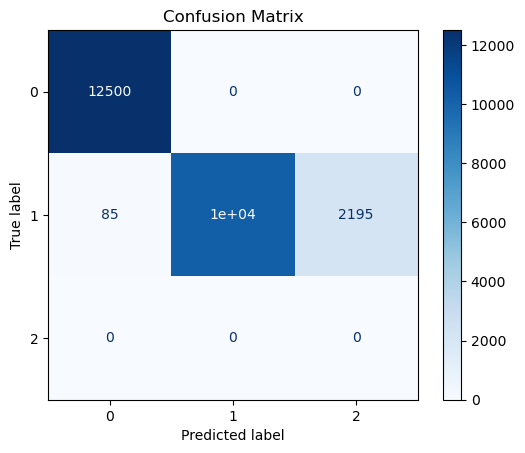

Precision: 1.00
Recall: 0.91


d:\miniconda3\envs\llms\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# Extract the columns for true and predicted labels
y_true = df_test["label"].astype(int)
# y_pred = df_test["Predicted"]
y_pred = df_test['Predicted'].astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(y_pred)))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate precision and recall
precision = precision_score(y_true, y_pred, average='weighted')  # For binary classification
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


In [45]:
print("Unique values in y_true:", set(y_true))
print("Unique values in y_pred:", set(y_pred))


Unique values in y_true: {0, 1}
Unique values in y_pred: {0, 1, 2}


In [46]:
for true, pred in zip(y_true[:10], y_pred[:10]):
    print(f"True: {true}, Predicted: {pred}")


True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
